# CH5 PREPARING TO MODEL THE DATA

# 5.2.1 PARTITION DATA

In [246]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random

bank = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/bank-additional.csv", delimiter=';')

In [28]:
bank_train, bank_test = train_test_split(bank, test_size=0.25, random_state=7)

In [37]:
bank_train['y'].value_counts()

no     2751
yes     338
Name: y, dtype: int64

In [39]:
# we want to increase % of 'yes' to 30%

In [40]:
# x = {0.3(3089)-338}/ 0.7 = 841

In [247]:
to_resample = bank_train.loc[bank_train['y'] == 'yes']
our_resample = to_resample.sample(n=841, replace=True)
bank_train_rebal = pd.concat([bank_train, our_resample]) 

bank_train_rebal['y'].value_counts()

no     2751
yes    1179
Name: y, dtype: int64

# CH5 HANDS-ON ANALYSIS 

# 5.21
Partition data set 50% training and 50% test, and confirm proportion by bar graph

In [103]:
import pandas as pd
adult = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/Adult")

In [248]:
from sklearn.model_selection import train_test_split
import random

adult_train, adult_test = train_test_split(adult, test_size=0.5, random_state=7)

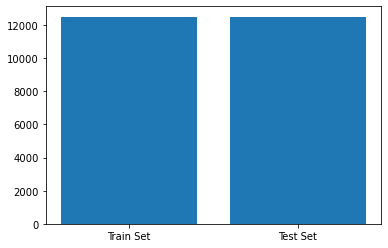

In [249]:
from matplotlib import pyplot as plt
bar_21 = plt.subplot()
bar_21.set_xticks([1,2])
bar_21.set_xticklabels(['Train Set', 'Test Set'])
plt.bar([1,2], [adult_train.shape[0], adult_test.shape[0]])
plt.show()

# 5.22
Identify total number of records in training data set, how many records in training data set have income >50K? 

In [70]:
adult_train.shape

(12500, 15)

In [80]:
sum(adult_train['income'] == '>50K.')

2981

# 5.23
how many records needed to resample to have 35% rebalanced data with >50K income

In [88]:
x = (0.35*12500 - 2981) / (1-0.35)
round(x)

2145

# 5.24
Perform rebalancing data so that 35% of records have income >50K

In [250]:
to_resample_24 = adult_train.loc[adult_train['income'] == '>50K.']
our_resample_24 = to_resample_24.sample(n=2145, replace=True)
adult_train_rebal = pd.concat([adult_train, our_resample_24]) 

adult_train_rebal['income'].value_counts()

<=50K.    9519
>50K.     5126
Name: income, dtype: int64

# 5.25  ????????????????????????????
Which baseline model do we use to compare classification model performance against?
To which value the baseline model assign all predictions? 
What is accuracy of the baseline model?

In [119]:
# Baseline Model : All positive model and All negative model  ?????????????????????????????

In [120]:
# All positive model assign all predictions as positive

In [123]:
# Accuracy of all positive model is p = 0.35, accuracy of all negative model is p = 0.65

# 5.26
Validate partition by two-sample-Z-test for difference in age means between training and test set

In [180]:
import pandas as pd
import numpy as np

In [185]:
# two sample mean Z-test (z-test when population std is known and Large sample size)

In [262]:
from statsmodels.stats.weightstats import ztest
ztest_26 = ztest(adult_train['age'], adult_test['age'], alternative='two-sided')
ztest_26
#Output : (zstat, pvalue)

(0.03927422091172619, 0.9686717594866987)

In [259]:
# two sample mean T-test (t-test when population std is unknown and Small sample size)

In [260]:
from statsmodels.stats.weightstats import ttest_ind
ttest_26 = ttest_ind(adult_train['age'], adult_test['age'], alternative='two-sided')
ttest_26
#Output : (tstat, pvalue, df)

(0.03927422091172619, 0.9686720731145602, 24998.0)

# 5.27
Validate partition by two-sample-Z-test for difference in proportion of >50K between training and test.

In [191]:
# two sample proportion Z-test (z-test when population std is known and Large sample size)

In [243]:
from statsmodels.stats.proportion import proportions_ztest

train_over50k, train_sample = (adult_train[adult_train['income']=='>50K.'].shape[0], adult_train.shape[0])
test_over50k, test_sample = (adult_test[adult_test['income']=='>50K.'].shape[0], adult_test.shape[0])

count = np.array([train_over50k, test_over50k])
nobs = np.array([train_sample, test_sample])

ztest_27 = proportions_ztest(count, nobs)
ztest_27 

(-0.32608987055319577, 0.7443563606617905)

In [244]:
stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))

z_stat: -0.326, p_value: 0.744


In [245]:
significance = 0.025
if p_value > significance:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

Fail to reject the null hypothesis - we have nothing else to say


# CH6 DECISION TREES

# 6.2.1 Build CART Decision Trees

In [87]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#from sklearn.tree import *

adult_tr = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/adult_ch6_training")
y = adult_tr[['Income']]

In [88]:
mar_np = np.array(adult_tr['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)

C:\Users\ronal\anaconda3\lib\site-packages\statsmodels\tools\tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [89]:
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_tr[['Cap_Gains_Losses']], mar_cat_pd), axis=1)

X_names = ['Cap_Gains_Losses', 'Divorced', 'Married', 'Never-married', 'Separated', 'Widowed']
y_names = ['<=50K', '>50K']

cart01 = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes=5).fit(X,y)

In [90]:
export_graphviz(cart01, out_file = 'C:/Users/ronal/Downloads/Python Practice/cart01.dot', 
                feature_names=X_names, class_names=y_names)

In [91]:
predIncomeCART = cart01.predict(X)
pd.DataFrame(predIncomeCART)

,0
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
18756,<=50K
18757,<=50K
18758,<=50K
18759,<=50K


[Text(167.4, 190.26, 'X[2] <= 0.5\ngini = 0.364\nsamples = 18761\nvalue = [14271, 4490]'),
 Text(83.7, 135.9, 'X[0] <= 0.047\ngini = 0.119\nsamples = 9891\nvalue = [9260, 631]'),
 Text(41.85, 81.53999999999999, 'gini = 0.083\nsamples = 9342\nvalue = [8938, 404]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 0.293\ngini = 0.485\nsamples = 549\nvalue = [322, 227]'),
 Text(83.7, 27.180000000000007, 'gini = 0.411\nsamples = 235\nvalue = [68, 167]'),
 Text(167.4, 27.180000000000007, 'gini = 0.309\nsamples = 314\nvalue = [254, 60]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 0.051\ngini = 0.492\nsamples = 8870\nvalue = [5011, 3859]'),
 Text(209.25, 81.53999999999999, 'gini = 0.465\nsamples = 7632\nvalue = [4821, 2811]'),
 Text(292.95, 81.53999999999999, 'gini = 0.26\nsamples = 1238\nvalue = [190, 1048]')]

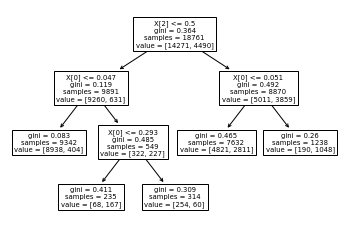

In [92]:
plot_tree(cart01)

# 6.3.1 Build C5.0 Decision Trees

In [338]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz

adult_tr = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/adult_ch6_training")
y = adult_tr[['Income']]

In [341]:
mar_np = np.array(adult_tr['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)

In [345]:
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_tr[['Cap_Gains_Losses']], mar_cat_pd), axis=1)

X_names = ['Cap_Gains_Losses', 'Divorced', 'Married', 'Never-married', 'Separated', 'Widowed']
y_names = ['<=50K', '>50K']

c50_01 = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5).fit(X,y)

In [346]:
export_graphviz(c50_01, out_file = 'C:/Users/ronal/Downloads/Python Practice/c50_01.dot', 
                feature_names=X_names, class_names=y_names)

In [348]:
c50_01.predict(X)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

# 6.4.1 Build Random Forests

In [352]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz

adult_tr = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/adult_ch6_training")
y = adult_tr[['Income']]

In [353]:
mar_np = np.array(adult_tr['Marital status'])
(mar_cat, mar_cat_dict) = stattools.categorical(mar_np, drop=True, dictnames=True)

In [354]:
mar_cat_pd = pd.DataFrame(mar_cat)
X = pd.concat((adult_tr[['Cap_Gains_Losses']], mar_cat_pd), axis=1)

X_names = ['Cap_Gains_Losses', 'Divorced', 'Married', 'Never-married', 'Separated', 'Widowed']
y_names = ['<=50K', '>50K']

In [364]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rfy = np.ravel(y)

rf01 = RandomForestClassifier(n_estimators=100, criterion='gini').fit(X,rfy)

In [363]:
rf01.predict(X)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

# CH6 HANDS-ON ANALYSIS

# 6.21
Create CART model that predicts 'Approval' using 'Debt-to-Income Ratio', 'FICO Score', 'Request Amount', Visualize, Describe few splits

In [395]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz

loans = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/loans_training")
res = loans[['Approval']]
pred = loans.drop(columns=['Approval','Interest'])

In [396]:
pred_names = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount']
res_names = ['T', 'F']

cart_loans = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes=5).fit(pred,res)

In [430]:
export_graphviz(cart_loans, out_file = 'C:/Users/ronal/Downloads/Python Practice/cart_loans.dot', 
                feature_names=pred_names, class_names=res_names)

In [435]:
predApprovalCART = cart_loans.predict(pred)

In [432]:
# Visualize

[Text(125.55000000000001, 190.26, 'X[1] <= 659.5\ngini = 0.5\nsamples = 150302\nvalue = [75066, 75236]'),
 Text(83.7, 135.9, 'gini = 0.076\nsamples = 46002\nvalue = [44194, 1808]'),
 Text(167.4, 135.9, 'X[0] <= 0.305\ngini = 0.417\nsamples = 104300\nvalue = [30872, 73428]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 25500.0\ngini = 0.338\nsamples = 91427\nvalue = [19678, 71749]'),
 Text(41.85, 27.180000000000007, 'gini = 0.308\nsamples = 80599\nvalue = [15331, 65268]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.481\nsamples = 10828\nvalue = [4347, 6481]'),
 Text(251.10000000000002, 81.53999999999999, 'X[0] <= 0.345\ngini = 0.227\nsamples = 12873\nvalue = [11194, 1679]'),
 Text(209.25, 27.180000000000007, 'gini = 0.465\nsamples = 4043\nvalue = [2560, 1483]'),
 Text(292.95, 27.180000000000007, 'gini = 0.043\nsamples = 8830\nvalue = [8634, 196]')]

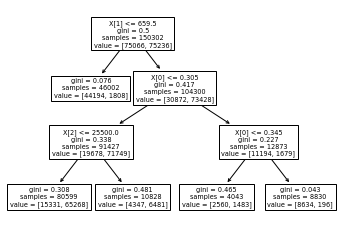

In [433]:
plot_tree(cart_loans)

In [402]:
# Describe

# 6.22 ?????????????????????????????????
Develop CART model using test data set, Visualize decision tree, Investigate splits, Does tree by test match tree by training? 

In [436]:
loans_test = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/loans_test")
res_test = loans_test[['Approval']]
pred_test = loans_test.drop(columns=['Approval','Interest'])

In [437]:
pred_names = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount']
res_names = ['T', 'F']

cart_loans_test = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes=5).fit(pred_test,res_test)

In [438]:
export_graphviz(cart_loans_test, out_file = 'C:/Users/ronal/Downloads/Python Practice/cart_loans_test.dot', 
                feature_names=pred_names, class_names=res_names)

In [439]:
predApprovalCART_test = cart_loans_test.predict(pred_test)

[Text(167.4, 190.26, 'X[1] <= 660.5\ngini = 0.5\nsamples = 49698\nvalue = [24934, 24764]'),
 Text(83.7, 135.9, 'X[1] <= 651.5\ngini = 0.09\nsamples = 15481\nvalue = [14754, 727]'),
 Text(41.85, 81.53999999999999, 'gini = 0.021\nsamples = 13309\nvalue = [13170, 139]'),
 Text(125.55000000000001, 81.53999999999999, 'gini = 0.395\nsamples = 2172\nvalue = [1584, 588]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 0.305\ngini = 0.418\nsamples = 34217\nvalue = [10180, 24037]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 24500.0\ngini = 0.339\nsamples = 29978\nvalue = [6488, 23490]'),
 Text(167.4, 27.180000000000007, 'gini = 0.303\nsamples = 25911\nvalue = [4821, 21090]'),
 Text(251.10000000000002, 27.180000000000007, 'gini = 0.484\nsamples = 4067\nvalue = [1667, 2400]'),
 Text(292.95, 81.53999999999999, 'gini = 0.225\nsamples = 4239\nvalue = [3692, 547]')]

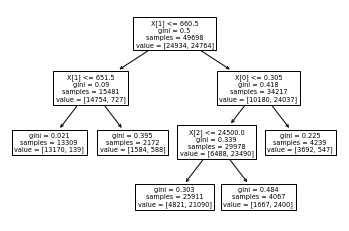

In [440]:
plot_tree(cart_loans_test)

In [441]:
# Describe

# 6.23
Build C5.0 model that predicts 'Approval' using 'Debt-to-Income Ratio', 'FICO Score', 'Request Amount', Specify min 1000 cases per nodes, Visualize, Describe

In [11]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import *

loans = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/loans_training")
res = loans[['Approval']]
pred = loans.drop(columns=['Approval','Interest'])

In [12]:
pred_names = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount']
res_names = ['T', 'F']

c50_loans = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, min_samples_leaf = 1000).fit(pred,res)

In [13]:
export_graphviz(c50_loans, out_file = 'C:/Users/ronal/Downloads/Python Practice/c50_loans.dot', 
                feature_names=pred_names, class_names=res_names)

In [14]:
predApprovalC50 = c50_loans.predict(pred)

[Text(167.4, 190.26, 'X[1] <= 656.5\nentropy = 1.0\nsamples = 150302\nvalue = [75066, 75236]'),
 Text(83.7, 135.9, 'X[1] <= 644.5\nentropy = 0.168\nsamples = 43749\nvalue = [42659, 1090]'),
 Text(41.85, 81.53999999999999, 'entropy = 0.025\nsamples = 36483\nvalue = [36394, 89]'),
 Text(125.55000000000001, 81.53999999999999, 'entropy = 0.578\nsamples = 7266\nvalue = [6265, 1001]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 0.315\nentropy = 0.886\nsamples = 106553\nvalue = [32407, 74146]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 669.5\nentropy = 0.773\nsamples = 94476\nvalue = [21477, 72999]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.991\nsamples = 10089\nvalue = [4489, 5600]'),
 Text(251.10000000000002, 27.180000000000007, 'entropy = 0.725\nsamples = 84387\nvalue = [16988, 67399]'),
 Text(292.95, 81.53999999999999, 'entropy = 0.453\nsamples = 12077\nvalue = [10930, 1147]')]

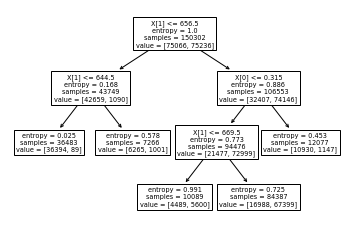

In [15]:
plot_tree(c50_loans)

In [16]:
# Describe

# 6.24
Describe similarities and difference between CART model and C50 model

In [17]:
#

# 6.25 ????????????????????
Create C50 model using test data set, Visualize, Match with training set

In [18]:
loans_test = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/loans_test")
res_test = loans_test[['Approval']]
pred_test = loans_test.drop(columns=['Approval','Interest'])

In [19]:
pred_names = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount']
res_names = ['T', 'F']

c50_loans_test = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=5, min_samples_leaf=1000).fit(pred_test,res_test)

In [20]:
export_graphviz(c50_loans_test, out_file = 'C:/Users/ronal/Downloads/Python Practice/c50_loans_test.dot', 
                feature_names=pred_names, class_names=res_names)

In [21]:
predApprovalC50_test = c50_loans_test.predict(pred_test)

[Text(167.4, 195.696, 'X[1] <= 655.5\nentropy = 1.0\nsamples = 49698\nvalue = [24934, 24764]'),
 Text(111.60000000000001, 152.208, 'entropy = 0.152\nsamples = 14182\nvalue = [13871, 311]'),
 Text(223.20000000000002, 152.208, 'X[0] <= 0.335\nentropy = 0.895\nsamples = 35516\nvalue = [11063, 24453]'),
 Text(167.4, 108.72, 'X[0] <= 0.265\nentropy = 0.801\nsamples = 32137\nvalue = [7820, 24317]'),
 Text(111.60000000000001, 65.232, 'X[1] <= 666.5\nentropy = 0.744\nsamples = 28840\nvalue = [6088, 22752]'),
 Text(55.800000000000004, 21.744, 'entropy = 1.0\nsamples = 2320\nvalue = [1150, 1170]'),
 Text(167.4, 21.744, 'entropy = 0.693\nsamples = 26520\nvalue = [4938, 21582]'),
 Text(223.20000000000002, 65.232, 'entropy = 0.998\nsamples = 3297\nvalue = [1732, 1565]'),
 Text(279.0, 108.72, 'entropy = 0.243\nsamples = 3379\nvalue = [3243, 136]')]

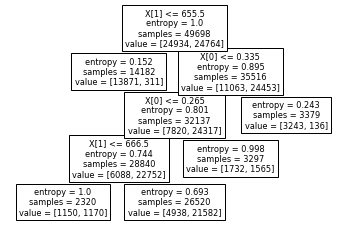

In [22]:
plot_tree(c50_loans_test)

In [23]:
# Describe

# 6.26
Obtain predicted value of 'Approval' using Random Forest on TRAINING set with same variables

In [24]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import *

loans = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/loans_training")
res = loans[['Approval']]
pred = loans.drop(columns=['Approval','Interest'])

In [25]:
pred_names = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount']
res_names = ['T', 'F']

In [26]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf_res = np.ravel(res)

rf_26 = RandomForestClassifier(n_estimators=100, criterion='gini').fit(pred,rf_res)

In [27]:
rf_26.predict(pred)

array(['F', 'F', 'F', ..., 'T', 'T', 'T'], dtype=object)

# 6.27  ??????????????????
Obtain predicted value of 'Approval' using Random Forest on TEST set with same variables, Build a table comparing between training and test

In [28]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import *

loans_test = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/loans_test")
res_test = loans_test[['Approval']]
pred_test = loans_test.drop(columns=['Approval','Interest'])

In [29]:
pred_names = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount']
res_names = ['T', 'F']

In [30]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf_res_test = np.ravel(res_test)

rf_26_test = RandomForestClassifier(n_estimators=100, criterion='gini').fit(pred_test,rf_res_test)

In [31]:
rf_26_test.predict(pred_test)

array(['F', 'F', 'F', ..., 'T', 'T', 'T'], dtype=object)

In [35]:
# how to compare???

In [36]:
compare_tr = pd.DataFrame(rf_26.predict(pred))
compare_te = pd.DataFrame(rf_26_test.predict(pred_test))

#compare_tr.shape
compare_te.shape
#pd.concat((compare_tr, compare_te), axis=1) XXXXXXXXXXXXX

(49698, 1)

# 6.28
Create CART model using training that predict 'Response' with predictors that I CHOOSE, Visualize Decision Tree, Describe

In [124]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import *

bank_train = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/bank_marketing_training")

res_tr = bank_train[['response']]
pred_tr = bank_train[['age', 'job','marital','education']]

In [125]:
np_job = np.array(bank_train['job'])
(cat_job, cat_dict_job) = stattools.categorical(np_job, drop=True, dictnames=True)

np_mar = np.array(bank_train['marital'])
(cat_mar, cat_dict_mar) = stattools.categorical(np_mar, drop=True, dictnames=True)

np_edu = np.array(bank_train['education'])
(cat_edu, cat_dict_edu) = stattools.categorical(np_edu, drop=True, dictnames=True)

C:\Users\ronal\anaconda3\lib\site-packages\statsmodels\tools\tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [153]:
pd_job_cat = pd.DataFrame(cat_job)
pd_mar_cat = pd.DataFrame(cat_mar)
pd_edu_cat = pd.DataFrame(cat_edu)

pred_tr_final = pd.concat((pred_tr['age'], pd_job_cat, pd_mar_cat, pd_edu_cat), axis=1)

In [156]:
#bank_x_names
#bank_y_names

job_names = list(set(bank_train['job']))
mar_names = list(set(bank_train['marital']))
edu_names = list(set(bank_train['education']))

bank_x_names = ['age']
for i in job_names:
    bank_x_names.append(i)
for j in mar_names:
    bank_x_names.append(j)
for k in edu_names:
    bank_x_names.append(k)

bank_y_names = ['yes', 'no']

In [157]:
#CART model

cart_bank = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes=5).fit(pred_tr_final,res_tr)

In [158]:
export_graphviz(cart_bank, out_file = 'C:/Users/ronal/Downloads/Python Practice/cart_bank.dot', 
                feature_names=bank_x_names, class_names=bank_y_names)

In [163]:
predResponseCART = cart_bank.predict(pred_tr_final)

[Text(223.20000000000002, 195.696, 'X[0] <= 60.5\ngini = 0.198\nsamples = 26874\nvalue = [23886, 2988]'),
 Text(167.4, 152.208, 'X[9] <= 0.5\ngini = 0.186\nsamples = 26291\nvalue = [23570, 2721]'),
 Text(111.60000000000001, 108.72, 'X[23] <= 0.5\ngini = 0.177\nsamples = 25693\nvalue = [23166, 2527]'),
 Text(55.800000000000004, 65.232, 'gini = 0.155\nsamples = 17983\nvalue = [16457, 1526]'),
 Text(167.4, 65.232, 'X[0] <= 28.5\ngini = 0.226\nsamples = 7710\nvalue = [6709, 1001]'),
 Text(111.60000000000001, 21.744, 'gini = 0.348\nsamples = 602\nvalue = [467, 135]'),
 Text(223.20000000000002, 21.744, 'gini = 0.214\nsamples = 7108\nvalue = [6242, 866]'),
 Text(223.20000000000002, 108.72, 'gini = 0.438\nsamples = 598\nvalue = [404, 194]'),
 Text(279.0, 152.208, 'gini = 0.496\nsamples = 583\nvalue = [316, 267]')]

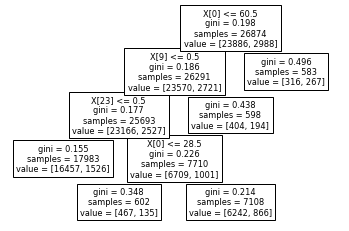

In [162]:
plot_tree(cart_bank)

# 6.29
Develop CART model using TEST set, Visualize, Describe, Does it match tree with training and with test set?

In [164]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import *

bank_test = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/bank_marketing_test")

res_te = bank_test[['response']]
pred_te = bank_test[['age', 'job','marital','education']]

In [165]:
np_job_te = np.array(bank_test['job'])
(cat_job_te, cat_dict_job_te) = stattools.categorical(np_job_te, drop=True, dictnames=True)

np_mar_te = np.array(bank_test['marital'])
(cat_mar_te, cat_dict_mar_te) = stattools.categorical(np_mar_te, drop=True, dictnames=True)

np_edu_te = np.array(bank_test['education'])
(cat_edu_te, cat_dict_edu_te) = stattools.categorical(np_edu_te, drop=True, dictnames=True)

C:\Users\ronal\anaconda3\lib\site-packages\statsmodels\tools\tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [166]:
pd_job_cat_te = pd.DataFrame(cat_job_te)
pd_mar_cat_te = pd.DataFrame(cat_mar_te)
pd_edu_cat_te = pd.DataFrame(cat_edu_te)

pred_te_final = pd.concat((pred_te['age'], pd_job_cat_te, pd_mar_cat_te, pd_edu_cat_te), axis=1)

In [167]:
#bank_x_names
#bank_y_names

job_names_te = list(set(bank_test['job']))
mar_names_te = list(set(bank_test['marital']))
edu_names_te = list(set(bank_test['education']))

bank_x_names_te = ['age']
for i in job_names_te:
    bank_x_names_te.append(i)
for j in mar_names_te:
    bank_x_names_te.append(j)
for k in edu_names_te:
    bank_x_names_te.append(k)

bank_y_names_te = ['yes', 'no']

In [169]:
#CART model

cart_bank_te = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes=5).fit(pred_te_final,res_te)

In [170]:
export_graphviz(cart_bank_te, out_file = 'C:/Users/ronal/Downloads/Python Practice/cart_bank_te.dot', 
                feature_names=bank_x_names_te, class_names=bank_y_names_te)

In [171]:
predResponseCART_te = cart_bank_te.predict(pred_te_final)

[Text(223.20000000000002, 195.696, 'X[0] <= 60.5\ngini = 0.198\nsamples = 26874\nvalue = [23886, 2988]'),
 Text(167.4, 152.208, 'X[9] <= 0.5\ngini = 0.186\nsamples = 26291\nvalue = [23570, 2721]'),
 Text(111.60000000000001, 108.72, 'X[23] <= 0.5\ngini = 0.177\nsamples = 25693\nvalue = [23166, 2527]'),
 Text(55.800000000000004, 65.232, 'gini = 0.155\nsamples = 17983\nvalue = [16457, 1526]'),
 Text(167.4, 65.232, 'X[0] <= 28.5\ngini = 0.226\nsamples = 7710\nvalue = [6709, 1001]'),
 Text(111.60000000000001, 21.744, 'gini = 0.348\nsamples = 602\nvalue = [467, 135]'),
 Text(223.20000000000002, 21.744, 'gini = 0.214\nsamples = 7108\nvalue = [6242, 866]'),
 Text(223.20000000000002, 108.72, 'gini = 0.438\nsamples = 598\nvalue = [404, 194]'),
 Text(279.0, 152.208, 'gini = 0.496\nsamples = 583\nvalue = [316, 267]')]

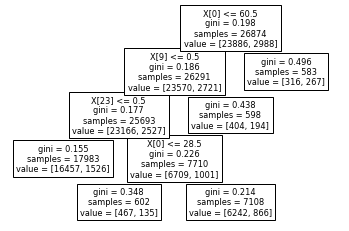

In [172]:
plot_tree(cart_bank_te)

# 6.30
Build C5.0 model using training set that predicts 'Response' with same variables, Specify min 1000 per node, Visualize, Describe

In [173]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import *

bank_train = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/bank_marketing_training")

res_tr = bank_train[['response']]
pred_tr = bank_train[['age', 'job','marital','education']]

In [174]:
np_job = np.array(bank_train['job'])
(cat_job, cat_dict_job) = stattools.categorical(np_job, drop=True, dictnames=True)

np_mar = np.array(bank_train['marital'])
(cat_mar, cat_dict_mar) = stattools.categorical(np_mar, drop=True, dictnames=True)

np_edu = np.array(bank_train['education'])
(cat_edu, cat_dict_edu) = stattools.categorical(np_edu, drop=True, dictnames=True)

C:\Users\ronal\anaconda3\lib\site-packages\statsmodels\tools\tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [176]:
pd_job_cat = pd.DataFrame(cat_job)
pd_mar_cat = pd.DataFrame(cat_mar)
pd_edu_cat = pd.DataFrame(cat_edu)

pred_tr_final = pd.concat((pred_tr['age'], pd_job_cat, pd_mar_cat, pd_edu_cat), axis=1)

In [177]:
#bank_x_names
#bank_y_names

job_names = list(set(bank_train['job']))
mar_names = list(set(bank_train['marital']))
edu_names = list(set(bank_train['education']))

bank_x_names = ['age']
for i in job_names:
    bank_x_names.append(i)
for j in mar_names:
    bank_x_names.append(j)
for k in edu_names:
    bank_x_names.append(k)

bank_y_names = ['yes', 'no']

In [178]:
c50_bank = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, min_samples_leaf = 1000).fit(pred_tr_final,res_tr)

In [179]:
export_graphviz(c50_bank, out_file = 'C:/Users/ronal/Downloads/Python Practice/c50_bank.dot', 
                feature_names=bank_x_names, class_names=bank_y_names)

In [180]:
predResponseC50 = c50_bank.predict(pred_tr_final)

[Text(200.88000000000002, 195.696, 'X[0] <= 58.5\nentropy = 0.503\nsamples = 26874\nvalue = [23886, 2988]'),
 Text(133.92000000000002, 152.208, 'X[0] <= 28.5\nentropy = 0.477\nsamples = 25820\nvalue = [23176, 2644]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.673\nsamples = 2794\nvalue = [2300, 494]'),
 Text(200.88000000000002, 108.72, 'X[23] <= 0.5\nentropy = 0.448\nsamples = 23026\nvalue = [20876, 2150]'),
 Text(133.92000000000002, 65.232, 'X[2] <= 0.5\nentropy = 0.404\nsamples = 15986\nvalue = [14697, 1289]'),
 Text(66.96000000000001, 21.744, 'entropy = 0.431\nsamples = 10672\nvalue = [9730, 942]'),
 Text(200.88000000000002, 21.744, 'entropy = 0.348\nsamples = 5314\nvalue = [4967, 347]'),
 Text(267.84000000000003, 65.232, 'entropy = 0.536\nsamples = 7040\nvalue = [6179, 861]'),
 Text(267.84000000000003, 152.208, 'entropy = 0.911\nsamples = 1054\nvalue = [710, 344]')]

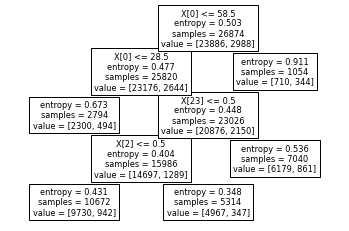

In [181]:
plot_tree(c50_bank)

In [182]:
# Describe

# 6.31 ??????????????
Describe similarities and difference between CART model and C5.0 model

# 6.32
Create C5.0 model using TEST set, Visualize, Does it match tree with training and with test set?

In [183]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import *

bank_test = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/bank_marketing_test")

res_tr = bank_test[['response']]
pred_tr = bank_test[['age', 'job','marital','education']]

In [184]:
np_job_te = np.array(bank_test['job'])
(cat_job_te, cat_dict_job_te) = stattools.categorical(np_job_te, drop=True, dictnames=True)

np_mar_te = np.array(bank_test['marital'])
(cat_mar_te, cat_dict_mar_te) = stattools.categorical(np_mar_te, drop=True, dictnames=True)

np_edu_te = np.array(bank_test['education'])
(cat_edu_te, cat_dict_edu_te) = stattools.categorical(np_edu_te, drop=True, dictnames=True)

C:\Users\ronal\anaconda3\lib\site-packages\statsmodels\tools\tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [185]:
pd_job_cat_te = pd.DataFrame(cat_job_te)
pd_mar_cat_te = pd.DataFrame(cat_mar_te)
pd_edu_cat_te = pd.DataFrame(cat_edu_te)

pred_te_final = pd.concat((pred_te['age'], pd_job_cat_te, pd_mar_cat_te, pd_edu_cat_te), axis=1)

In [186]:
#bank_x_names
#bank_y_names

job_names_te = list(set(bank_test['job']))
mar_names_te = list(set(bank_test['marital']))
edu_names_te = list(set(bank_test['education']))

bank_x_names_te = ['age']
for i in job_names_te:
    bank_x_names_te.append(i)
for j in mar_names_te:
    bank_x_names_te.append(j)
for k in edu_names_te:
    bank_x_names_te.append(k)

bank_y_names_te = ['yes', 'no']

In [187]:
c50_bank_te = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, min_samples_leaf = 1000).fit(pred_te_final,res_te)

In [188]:
export_graphviz(c50_bank_te, out_file = 'C:/Users/ronal/Downloads/Python Practice/c50_bank_te.dot', 
                feature_names=bank_x_names_te, class_names=bank_y_names_te)

In [189]:
predResponseC50_te = c50_bank_te.predict(pred_te_final)

[Text(200.88000000000002, 195.696, 'X[0] <= 58.5\nentropy = 0.503\nsamples = 26874\nvalue = [23886, 2988]'),
 Text(133.92000000000002, 152.208, 'X[0] <= 28.5\nentropy = 0.477\nsamples = 25820\nvalue = [23176, 2644]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.673\nsamples = 2794\nvalue = [2300, 494]'),
 Text(200.88000000000002, 108.72, 'X[23] <= 0.5\nentropy = 0.448\nsamples = 23026\nvalue = [20876, 2150]'),
 Text(133.92000000000002, 65.232, 'X[2] <= 0.5\nentropy = 0.404\nsamples = 15986\nvalue = [14697, 1289]'),
 Text(66.96000000000001, 21.744, 'entropy = 0.431\nsamples = 10672\nvalue = [9730, 942]'),
 Text(200.88000000000002, 21.744, 'entropy = 0.348\nsamples = 5314\nvalue = [4967, 347]'),
 Text(267.84000000000003, 65.232, 'entropy = 0.536\nsamples = 7040\nvalue = [6179, 861]'),
 Text(267.84000000000003, 152.208, 'entropy = 0.911\nsamples = 1054\nvalue = [710, 344]')]

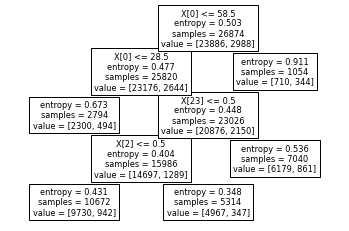

In [190]:
plot_tree(c50_bank_te)

In [191]:
# Describe

# 6.33
Use Random Forest to predict 'Response' using training set

In [193]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import *

bank_train = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/bank_marketing_training")

res_tr = bank_train[['response']]
pred_tr = bank_train[['age', 'job','marital','education']]

In [198]:
np_job = np.array(bank_train['job'])
(cat_job, cat_dict_job) = stattools.categorical(np_job, drop=True, dictnames=True)

np_mar = np.array(bank_train['marital'])
(cat_mar, cat_dict_mar) = stattools.categorical(np_mar, drop=True, dictnames=True)

np_edu = np.array(bank_train['education'])
(cat_edu, cat_dict_edu) = stattools.categorical(np_edu, drop=True, dictnames=True)

C:\Users\ronal\anaconda3\lib\site-packages\statsmodels\tools\tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [199]:
pd_job_cat = pd.DataFrame(cat_job)
pd_mar_cat = pd.DataFrame(cat_mar)
pd_edu_cat = pd.DataFrame(cat_edu)

pred_tr_final = pd.concat((pred_tr['age'], pd_job_cat, pd_mar_cat, pd_edu_cat), axis=1)

In [200]:
#bank_x_names
#bank_y_names

job_names = list(set(bank_train['job']))
mar_names = list(set(bank_train['marital']))
edu_names = list(set(bank_train['education']))

bank_x_names = ['age']
for i in job_names:
    bank_x_names.append(i)
for j in mar_names:
    bank_x_names.append(j)
for k in edu_names:
    bank_x_names.append(k)

bank_y_names = ['yes', 'no']

In [201]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf_res_bank = np.ravel(res_tr)

rf_33 = RandomForestClassifier(n_estimators=100, criterion='gini').fit(pred_tr_final,rf_res_bank)

In [203]:
rf_33.predict(pred_tr_final)

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

# 6.34
Use Random Forest to predict 'Response' using test set, Compare tree with training and with test set

In [204]:
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import *

bank_test = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/bank_marketing_test")

res_te = bank_test[['response']]
pred_te = bank_test[['age', 'job','marital','education']]

In [205]:
np_job_te = np.array(bank_test['job'])
(cat_job_te, cat_dict_job_te) = stattools.categorical(np_job_te, drop=True, dictnames=True)

np_mar_te = np.array(bank_test['marital'])
(cat_mar_te, cat_dict_mar_te) = stattools.categorical(np_mar_te, drop=True, dictnames=True)

np_edu_te = np.array(bank_test['education'])
(cat_edu_te, cat_dict_edu_te) = stattools.categorical(np_edu_te, drop=True, dictnames=True)

C:\Users\ronal\anaconda3\lib\site-packages\statsmodels\tools\tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [206]:
pd_job_cat_te = pd.DataFrame(cat_job_te)
pd_mar_cat_te = pd.DataFrame(cat_mar_te)
pd_edu_cat_te = pd.DataFrame(cat_edu_te)

pred_te_final = pd.concat((pred_te['age'], pd_job_cat_te, pd_mar_cat_te, pd_edu_cat_te), axis=1)

In [207]:
#bank_x_names
#bank_y_names

job_names_te = list(set(bank_test['job']))
mar_names_te = list(set(bank_test['marital']))
edu_names_te = list(set(bank_test['education']))

bank_x_names_te = ['age']
for i in job_names_te:
    bank_x_names_te.append(i)
for j in mar_names_te:
    bank_x_names_te.append(j)
for k in edu_names_te:
    bank_x_names_te.append(k)

bank_y_names_te = ['yes', 'no']

In [209]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf_res_bank_te = np.ravel(res_te)

rf_33_te = RandomForestClassifier(n_estimators=100, criterion='gini').fit(pred_te_final,rf_res_bank_te)

In [210]:
rf_33_te.predict(pred_te_final)

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [211]:
# Compare prediction from training and from test set